In [ ]:
! pip install triton 2.0.0

ERROR: Could not find a version that satisfies the requirement 2.0.0 (from versions: none)
ERROR: No matching distribution found for 2.0.0


In [ ]:
! pip install torch==2.1.0

In [ ]:
! pip install git+https://github.com/openai/whisper.git -q


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import whisper

model = whisper.load_model("base")

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 57.8MiB/s]


In [ ]:
from IPython.display import Audio
Audio("/content/audio_sample.mp3")

In [ ]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("/content/audio_sample.mp3")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

Detected language: en
I am dedicated and highly skilled professional with the wealth of experience in conceiving, developing and deploying cutting edge projects that span the realms of machine learning, deep learning, internet of things and computer reasons. My particular expertise lies in object detection using deep learning techniques, a passion that fails my work every day.


#Evaluation of multilingual whispher
#Evaluation 1 : Word Error Rate (WER) and Character Error Rate (CER)


In [ ]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 17.1 MB/s eta 0:00:00


In [ ]:
import jiwer  # Install it using pip if you haven't already

# True text and recognized text
true_text = "'m a dedicated and highly skilled professional with a wealth of experience in conceiving, developing, and deploying cutting-edge projects that span the realms of Machine Learning (ML), Deep Learning (DL), Internet of Things (IoT), and Computer Vision. My particular expertise lies in object detection using state-of-the-art Deep Learning techniques, a passion that fuels my work every day."
recognized_text = result.text  # The text output from your ASR model

# Compute Word Error Rate
wer = jiwer.wer(true_text, recognized_text)

print(f"Word Error Rate: {wer}")

# Compute Character Error Rate
cer = jiwer.cer(true_text, recognized_text)

print(f"Character Error Rate: {cer}")


Word Error Rate: 0.3684210526315789
Character Error Rate: 0.14910025706940874


# Evaluation 2 : N-gram technique

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

N=2:
Precision: 0.559322033898305
Recall: 0.4714285714285714
F1 Score: 0.5116279069767442

N=3:
Precision: 0.4482758620689655
Recall: 0.37681159420289856
F1 Score: 0.4094488188976378

N=4:
Precision: 0.3508771929824561
Recall: 0.29411764705882354
F1 Score: 0.31999999999999995

N=5:
Precision: 0.25
Recall: 0.208955223880597
F1 Score: 0.22764227642276422



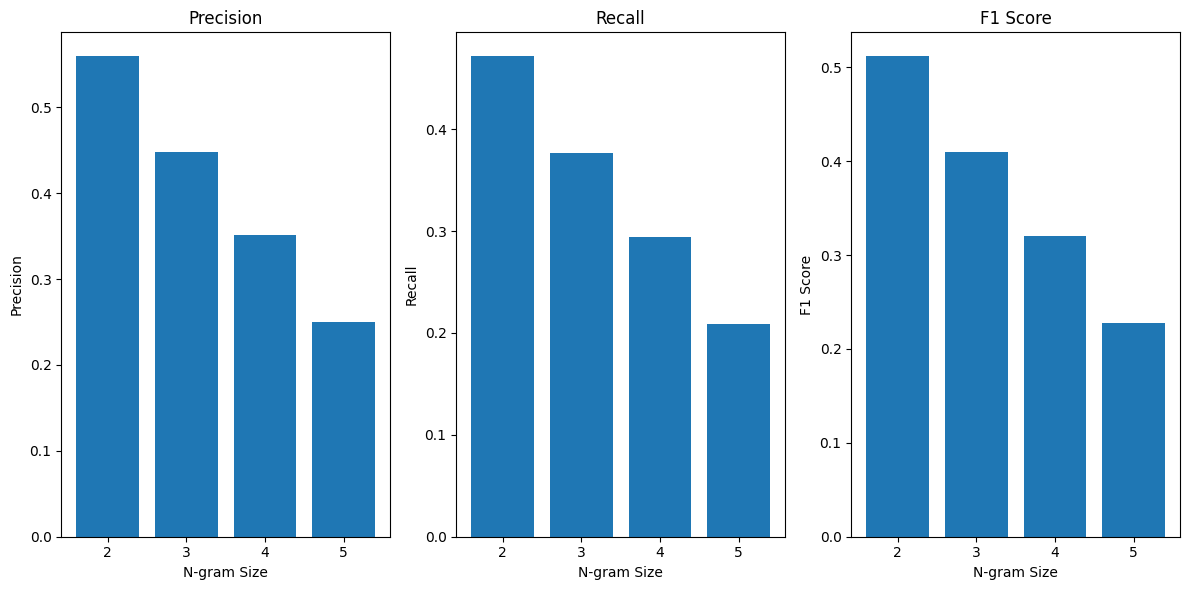

In [ ]:
from nltk.util import ngrams
import nltk
import matplotlib.pyplot as plt

# Tokenize true text and recognized text
true_text_tokens = nltk.word_tokenize(true_text)
recognized_text_tokens = nltk.word_tokenize(recognized_text)

# Define a range of N values (2 to 5)
n_values = range(2, 6)

# Initialize lists to store evaluation metric values
precisions = []
recalls = []
f1_scores = []

for n in n_values:
    # Create N-grams from the tokenized text
    true_text_ngrams = list(ngrams(true_text_tokens, n))
    recognized_text_ngrams = list(ngrams(recognized_text_tokens, n))

    # Calculate the intersection of N-grams
    intersection = len(set(true_text_ngrams).intersection(recognized_text_ngrams))

    # Calculate precision, recall, and F1-score
    precision = intersection / len(recognized_text_ngrams)
    recall = intersection / len(true_text_ngrams)
    f1_score = (2 * precision * recall) / (precision + recall)

    # Append metric values to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Print the scores for each N-gram size
for n, precision, recall, f1_score in zip(n_values, precisions, recalls, f1_scores):
    print(f"N={n}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print()

# Create subplots and display the plots
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.bar(n_values, precisions)
plt.title('Precision')
plt.xlabel('N-gram Size')
plt.ylabel('Precision')

plt.subplot(132)
plt.bar(n_values, recalls)
plt.title('Recall')
plt.xlabel('N-gram Size')
plt.ylabel('Recall')

plt.subplot(133)
plt.bar(n_values, f1_scores)
plt.title('F1 Score')
plt.xlabel('N-gram Size')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


#Evaluation 3 : BLEU (Bilingual Evaluation Understudy)

In [ ]:
# Tokenize the reference and hypothesis texts
reference_tokens = nltk.word_tokenize(true_text)
hypothesis_tokens = nltk.word_tokenize(recognized_text)

# Calculate BLEU score
bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_tokens], hypothesis_tokens)

print(f"BLEU Score: {bleu_score}")

BLEU Score: 0.41956118868575765


#Evaluation 4 : METEOR (Metric for Evaluation of Translation with Explicit ORdering)

In [ ]:
from nltk.stem import PorterStemmer

def meteor_score(reference, hypothesis):
    # Tokenize reference and hypothesis
    reference_tokens = nltk.word_tokenize(reference)
    hypothesis_tokens = nltk.word_tokenize(hypothesis)

    # Stem words using the Porter stemmer
    stemmer = PorterStemmer()
    reference_stems = [stemmer.stem(token) for token in reference_tokens]
    hypothesis_stems = [stemmer.stem(token) for token in hypothesis_tokens]

    # Calculate precision and recall
    precision = len(set(reference_stems).intersection(hypothesis_stems)) / len(hypothesis_stems)
    recall = len(set(reference_stems).intersection(hypothesis_stems)) / len(reference_stems)

    # Calculate METEOR score
    beta = 1.0  # You can adjust this parameter
    meteor = precision * recall / ((1 - beta) * precision + beta * recall)

    return meteor
reference =  true_text
hypothesis = recognized_text

meteor = meteor_score(reference, hypothesis)
print(f"METEOR Score: {meteor}")


METEOR Score: 0.65


#Rag Model

In [ ]:
!pip install transformers

# Summarization of the text

In [2]:
!pip install transformers

In [3]:
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [9]:
text = """
  I am dedicated and highly skilled professional with the wealth of experience in conceiving, developing and deploying cutting edge projects
  that span the realms of machine learning, deep learning, internet of things and computer reasons. My particular expertise lies in object
  detection using deep learning techniques, a passion that fails my work every day.
"""

In [5]:
summarizer(text, max_length=30, min_length=15 ,do_sample=False)

[{'summary_text': 'I am dedicated and highly skilled professional with the wealth of experience in conceiving, developing and deploying cutting edge projects. My particular expertise lies'}]

# Translation

In [1]:

!pip install -q gradio
!pip install -q transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.3 

In [2]:

import gradio as gr
from transformers import pipeline

In [14]:

translation_pipeline = pipeline("translation_en_to_fr")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [17]:

result = translation_pipeline(text)

In [18]:

result[0]["translation_text"]

'Je suis un professionnel dévoué et hautement qualifié qui possède une vaste expérience de la conception, du développement et de la mise en uvre de projets de pointe dans les domaines de l’apprentissage machine, de l’apprentissage profond, de l’Internet des choses et des raisons informatiques.'

In [19]:

def translate_gradio(input):
    result = translation_pipeline(input)
    return result[0]['translation_text']

In [20]:

translate_interface = gr.Interface(fn = translate_gradio,
                                   inputs="text",
                                   outputs="text")

In [21]:
translate_interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://35ab6269ed1deec8c1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
